# Evaluating and Optimizing Machine Learning Techniques for Automatic Nuclei Detection

<b>1. Motivation</b>

Many people die from cancer every year. This is terribly sad. :’( We would like to prevent this. One option is to identify the cancer early; treatment of nascent cancers tends to be more successful. Often, cells suffering from cancer display different biomarkers in their nuclei. These biomarkers can be seen in immunohistochemical (IHC) imaging. If there were a rapid and accurate way to screen images for cancerous cells, many cancer prognoses could be improved. We aim to develop an automated cell nuclei detection technique.

<b>2. Challenges</b>

Imaging conditions can vary tremendously - illumination, contrast, fluorescence and staining will all affect the appearance of the cell. We would also like our technique to be generalizable to many cell types because cancer is insidious and affects many cell types. Depending on the biological sample that was imaged, cells may also be aggregated; where a trained eye could distinguish individual nuclei, an algorithm might falter. 

<b>3. Pre-treatment and Initial Segmentation (“Detection”)</b>

Colour is usually either normalized or thresholded to remove noise and background [1]. A variety of pre-processing techniques can be used to find objects, from conventional blob detection, to morphological and/or contour resolution, to watershed segmentation [2-4]. We will use sensible discretion to pick a pre-treatment technique.

<b>4. Segmentation and Identification</b>

There are two primary approaches to cell segmentation:

<b><i>Traditional methods segment nuclei from single or overlapping cells</i></b>

Several traditional methods, often involving a-priori knowledge of cell shape and size [5]. First, cell clusters are segmented from the background by concavity [6-7]. Next, cell clusters can be separated into individual cells based on the concavity of the intensity distribution [7]. After individual cells have been identified, cell boundaries are often approximated using elliptical curve-fitting techniques [5,7]. Further segmentation can be applied to separate the cell nucleus from the cytoplasm. A gradient vector flow active contour model (GVF-ACM) has been shown to find boundaries between the nucleus and cytoplasm [8].

In this work, we can begin performing segmentation using the scikit-image package for python. This package includes methods for ellipse and boundary fitting, as well as edge detection and active contour modeling.

<b><i>Machine learning methods identify nuclei via classification algorithms</i></b>

Machine learning and pattern recognition have been successfully used to identify and segment cells in IHC images [9]. Whether using techniques such as cluster analysis [10], random forests [9], or deep neural networks [11-13], the workflow is similar. First, initial segmentation is performed (often in the pre-treatment step) to find cells and agglomerates. Then, training data is fed through a classifier to extract the most important features. Repeating this process while keeping only the most important feature vectors establishes a model, which is finally used to classify new test data.

We will start with cluster analysis and random forest classifiers (from the scikit-learn package), but likely will also employ traditional GVF or ellipse-fitting algorithms (which we will implement in python) to refine initial segmentation. If necessary, we also intend to look into convolutional neural networks implemented with the TensorFlow package.

### References

[1] M. Veta, P.J. Van Diest, R. Kornegoor, A. Huisman, M.A. Viergever, and J.P.W. Pluim. (<b>2013</b>) Automatic Nuclei Segmentation in H&E Stained Breast Cancer Histopathology Images. <i>PLoS One</i>, 8, 7.

[2] X. Yang, H. Li, and X. Zhou. (<b>2006</b>) Nuclei Segmentation using Marker-Controlled Watershed, Tracking using Mean-Shift, and Kalman Filter in Time-Lapse Microscopy. <i>IEEE Trans. Circuits Syst. I, Reg. Papers.</i>, 53, 11.

[3] J. Cheng and J.C. Rajapakse. (<b>2009</b>) Segmentation of Clustered Nuclei with Shape Markers and Marking Function. <i>IEEE Trans. Biomed. Eng.</i>, 56, 3.

[4] S. Ali and A. Madabhushi, “An Integrated Region-, Boundary-, Shape-Based Active Contour for Multiple Object Overlap Resolution in Histological Imagery. <i>IEEE Trans. Med. Imag.</i>, 31, 7.

[5] S. Kothari, Q. Chaudry, M.D. Wang. (2009) Automated Cell Counting and Cluster Segmentation Using Concavity Detection and Ellipse Fitting Techniques. <i>Proc. IEEE Int. Symp. Biomed. Imaging</i>, 795.

[6] Y. Toyoshima, T. Tokunaga, O. Hirose, M. Kanamori, T. Teramoto, M.S. Jang, S. Kuge, T. 
Ishihara, R. Yoshida, and Y. Iino. (<b>2006</b>) Accurate Automatic Detection of Densely Distributed Cell Nuclei in 3D Space. <i>PLoS. Comput. Biol.</i>, 12, 6.

[7] H.S. Wu, J. Gil, and J.Barba. (<b>1998</b>) Optimal Segmentation of Cell Images. <i>IEE P-Vis. Image. Sign.</i>, 145, 1.

[8] S.F. Yang-Mao, Y.K. Chan, and Y.P. Chu. (<b>2008</b>) Edge enhancement nucleus and cytoplast contour detector of cervical smear images. <i>IEEE Trans. Syst. Man, Cybern. B</i>, 38, 2.

[9] O. Rujuta and A.J. Vyavahare. (<b>2017</b>) Review of Nuclei Detection, Segmentation in Microscopic Images. <i>J. Bioengineer. Biomed. Sci.</i>, 7, 2.

[10] S. Wienert, D. Heim, K. Saeger, A. Stenzinger, M. Beil, P. Hufnagl, M. Dietel, C. Denkert, F. Klauschen. (<b>2012</b>) Detection and Segmentation of Cell Nuclei in Virtual Microscopy Images: A Minimum-Model Approach. <i>Sci. Rep.</i>, 2, 503.

[11] S.K. Sadanandan, P. Ranefall, S. Le Guyader, and C. Wahlby. (<b>2017</b>) Automated Training of Deep Convolutional Neural Networks for Cell Segmentation. <i>Sci. Rep.</i>, 7, 1.

[12] K. Sirinukunwattana, S.E.A. Raza, Y.W Tsang, I.A. Cree, D.R.J. Snead, and N.M. Rajpoo. (<b>2016</b>) Locality Sensitive Deep Learning for Detection and Classification of Nuclei in Routine Colon Cancer Histology Images. <i>IEEE Trans. Med. Imag.</i>, 35, 99.

[13] N. Kumar, R. Verma, S. Sharma, S. Bhargava, A. Vahadane, and A. Sethi. (<b>2017</b>) A Dataset and a Technique for Generalized Nuclear Segmentation for Computational Pathology. <i>IEEE Trans. Med. Imag.</i>, 36, 7.

In [1]:
## change the following to where you have stored and/or extracted the files
path = './project/'
# path = '/Users/arrakis/Dropbox/Tool - Classes/ChBE 8803/Project'

n_samples = 3 #/665 total datasets in train1

###################################################################

# UPDATED 3/28 ideas for future work
Updates (3/29 4 am)

* KMEANS clustering to separate into different cell/conditions type - will fix tomorrow (tired)

* Watershed performance metrics calculated (comparable to the random forest now)

* SVM classifier for detection (slow to train) - took 30 min and wasn't finished so I removed it(same Xtrain, Ytrain as random forest)

* Random forest classifier using HSV instead of RGB values

* Example of an active contour model, but so far it seems too slow to be practical

* Plan to add chan-vese level set segmentation


Detection
* try splitting three channels as HSV instead of RGB
 
* do dimensional reduction / PCA on all training set images to parse into different cell/conditions type, then threshold each one with best method for group

Segmentation

# Package Requirements

* numpy version 1.13.3
* pandas version 0.20.3
* matplotlib version
* sklearn version 0.19.1
* skimage version 0.13.0
* cv2 (used for image processing)
    * See lines 1-3 in the next block for installation on mac (version 3.2.0.6)
    * For PC, installation worked with pip install opencv-python from the anaconda prompt (version 3.4.0)


In [2]:
#import sys
#!{sys.executable} -m pip install opencv-python==3.2.0.6 # for mac
# >> https://stackoverflow.com/questions/47963386/image-not-found-error-after-installing-opencv-python-wheel-on-mac

## load all packages used below
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import zipfile, io
import numpy as np
import pandas as pd
import pylab as plt
import sklearn, cv2
import matplotlib.image as mpimg
from scipy import ndimage
from scipy.ndimage import label
from skimage import feature
from skimage.filters import sobel, laplace
from skimage.morphology import watershed
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Dataset

* ```stage1_train.zip```: zipped training set of 665 images, each with between 4 and ~380 masks (total = 32145 files)
* ```stage1_test.zip```: zipped test set of 65 images

Because these datasets are so large, we use ```load_zipped_img``` to access the zip file directly and read out images and associated masks without extracting the .zip takes an image and set of masks from the .zip

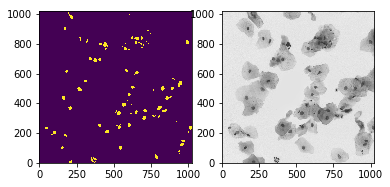

In [3]:
def load_zipped_img(path, img_index): # load an image and all its masks
    z = zipfile.ZipFile(path,'r') # access zip folder
    zlist = z.namelist() # list of files in zip folder
    
    img_name = zlist[img_index] # get selected image
    img_name = img_name[0:-1] # eliminate "/"
    
    # get image and return as np array
    img_raw = z.read('{}/images/{}.png'.format(img_name,img_name)) # get raw image
    img = io.BytesIO(img_raw) # convert image
    img = mpimg.imread(img) # numpy array
    img = np.flip(img,0) # flip image
    
    # get all masks and return as np array
    mask_list = []
    for string in zlist:
        if string.startswith(img_name+'/mask'):
            mask_list.append(string)
    mask_list = mask_list[1:-1] # list of masks
    
    masks = []
    for m in mask_list:
        mask_raw = z.read(m) # get raw mask
        mask = io.BytesIO(mask_raw) # convert mask
        mask = mpimg.imread(mask) # numpy array
        mask = np.flip(mask,0) # flip mask
        masks.append(mask)
        
    return img, masks

# WORKING EXAMPLE OF load_zipped_img

(img, masks) = load_zipped_img(path+'/stage1_train.zip',177) # The one example that the model performs poorly for

fig, ax = plt.subplots(1,2)

ax[0].imshow(sum(masks), origin='lower')
ax[1].imshow(img, origin='lower')
plt.show()

# Detection: Separating Object from Background

Before determining the positions of nuclei in an image, it is key to separate the image from the background using a process called image segmentation. Image segmentation is typically performed on grayscale images.

* The grayscale function converts images from rgb to grayscale
* The otsu function selects an optimal threshold for equal inter-/intra-class variance
* The function float2int8 converts the data type to int8, which is required for the cv2 package
* The function watershed applies watershed segmentation to a given image to determine objects and background with the following outputs
    * img_guess: masked objects identified by watershed segmentation
    * sure_bg: background pixels identifed with high confidence
    * sure_fg: object pixels identified with high confidence
    * uncertain: the region between sure_bg and sure_fg where pixels are identified with low confidence

In [4]:
# convert to grayscale
def grayscale(im):
    return rgb2gray(im)

# Otsu's Method, calculates optimal threshold for equal inter-/intra-class variance
def otsu(image_gray):
    threshold_val = threshold_otsu(image_gray) #Select threshold from Otsu's method
    img_masked = np.where(image_gray > threshold_val, 1, 0)

    if np.sum(img_masked==0) < np.sum(img_masked==1):
        img_masked = np.where(img_masked, 0, 1)
    return img_masked

# Function to convert float32 raw images to int8 single channel
def float2int8(img_float):
    img_int8 = (img_float * 255).round().astype(np.uint8)
    return img_int8

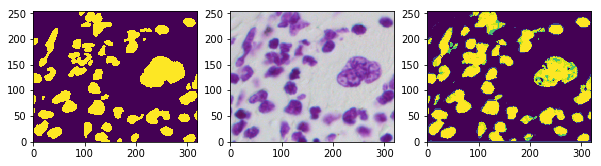

In [5]:
# Function to watershed segment images
def watershed(img_float32):
    img = img_float32[:, :, :3]
    
    # convert input image (float32) to 3-channel int8
    ch1 = float2int8(otsu(img[:,:,0:1][:,:,0]))
    ch2 = float2int8(otsu(img[:,:,1:2][:,:,0]))
    ch3 = float2int8(otsu(img[:,:,2:3][:,:,0]))
    img_guess = cv2.merge([ch1,ch2,ch3])
    
    # greyscale and otsu threshold original image
    img_grey = grayscale(img)
    int8_thresh = float2int8(otsu(img_grey))

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(int8_thresh,cv2.MORPH_OPEN,kernel,iterations=2)
    
    # find sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    
    # find sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
    sure_fg = np.uint8(sure_fg)

    # finding uncertain region
    uncertain = cv2.subtract(sure_bg,sure_fg)
    
    # marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+1 # add one to all labels so sure background is 1 (not 0)
    markers[uncertain==255] = 0 # mark unknown region as 0

    # apply watershed and mark boundary as -1
    markers = cv2.watershed(img_guess, markers)
    img_guess[markers == -1] = [255,0,0]

    return img_guess, markers, sure_bg, sure_fg, uncertain


#### TESTING
(img, mask) = load_zipped_img(path+'/stage1_train.zip', 510)

img_guess, markers, sure_bg, sure_fg, uncertain = watershed(img)

fig, ax = plt.subplots(1,3, figsize = (10,10))

ax[0].imshow(sum(mask), origin='lower')
ax[1].imshow(img, origin='lower')
ax[2].imshow(grayscale(img_guess), origin='lower')
plt.show()

In [6]:
# Watershed Testing

for i in range(0,560):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i)

    (img_guess, markers, sure_bg, sure_fg, unknown) = watershed(img)
    yp = np.round(grayscale(img_guess)).reshape(-1,1)
    y_real = sum(masks).reshape(-1,1)
    accuracy = sklearn.metrics.accuracy_score(y_real, yp)
    precision = sklearn.metrics.precision_score(y_real, yp)
    f1 = sklearn.metrics.f1_score(y_real, yp)
    print(i, accuracy, precision, f1)
    acc.append([accuracy, precision, f1])

    #output = yp.reshape(shap[0],shap[1])
    
precision = np.mean(np.array(acc)[:,1])
accuracy = np.mean(np.array(acc)[:,0])
f1 = np.mean(np.array(acc)[:,2])
print('The average precision of the model is {}%'.format(precision*100))
print('The average accuracy of the model is {}%'.format(accuracy*100))
print('The average f1-score of the model is {}%'.format(f1*100))

0 0.97004699707 0.941236068896 0.791059073976


NameError: name 'acc' is not defined

# Classify Images for Future Segmentation

* Imaging conditions can vary from image to image. It can be difficult to determine a general method for nucleus segmentation under the variety of conditions. This section provides a method for separating images by type using a KMeans clustering algorithm.

* The function img_info determines a 

In [6]:
# one-indexes a 2d array into 1d, top down then left right, output is np 1d array
def one_index(arr2d):
    h, w = arr2d.shape[0:2]
    
    arr1d = []
    for col in range(0, w):
        for row in range(0, h):
            arr1d.append(arr2d[row][col])
    return np.array(arr1d)
    
# pads all vectors in array to have max_len, returns np array
def pad_normalize(array, max_len):
    for i in range(0, len(array)):
        vec = array[i]
        print(len(vec))
        if len(vec) < max_len:
            array[i] = np.concatenate(( np.array(vec).reshape(1,-1), np.zeros((1, (max_len-len(vec)))) ), axis=1)
        else:
            array[i] = np.array(vec).reshape(1,-1)
    return np.array(array)



In [7]:
# Get image information, apply clustering
def get_image_info(samples):
    # complete img ,rgb mode
    full_img_list = []
    # just grey mode
    img_list = []
    
    # average value of gray pixels per image
    average_list = []
    
    # max Contour area value per image
    max_cnt_area = []
    
    # mean Contour area value per image
    average_cnt_area = []
    
    # how many Contour areas per image
    num_cnt = []
    
    #  width per image
    wid_list = []
    
    #  length per image
    len_list = []
    
    #  red per image
    r=[]
    
    #  green
    g=[]
    
    #  blue
    b=[]
    for i in samples:
        (img, masks) = load_zipped_img(path+'/stage1_train.zip', i)
        full_img_list.append(i)  
        r.append(np.average(img[:,:,0]))
        g.append(np.average(img[:,:,1]))
        b.append(np.average(img[:,:,2]))
        
        img = grayscale(img)
        img = float2int8(img)
        #img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
        print(i)
        # in some cases, image background is bright and cell darker, there needs a inverse of pixel value
        if np.average(img) > 125:
            img = 255 - img   
        img_list.append(img)

        lenth = img.shape[0]
        len_list.append(lenth)
        width = img.shape[1]
        wid_list.append(width)
        average_list.append(np.average(img))
        
        # use opencv to find contour and get some stactistic data
        img = cv2.GaussianBlur(img, (3, 3), 1)
        ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

        _, cnts, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
        max_cnt_area.append(cv2.contourArea(cnts[0])/lenth/width)

        av = 0
        for i in cnts:
            av = av + cv2.contourArea(i)
        av = av/len(cnts)
        
        # since different pic has different size, we'd better normalise it 
        average_cnt_area.append(av/lenth/width)
        num_cnt.append(len(cnts))
        
    df = pd.DataFrame({'img':full_img_list,'max_area':max_cnt_area,'average_area':average_cnt_area,
                       'num_cnt':num_cnt,'average':average_list,'wid':wid_list,'len':len_list,
                       'r':r,'g':g,'b':b
                      }) 
    return df

df = get_image_info(range(0,560))





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106


KeyboardInterrupt: 

In [87]:
df.to_csv('KMEANS_summary.csv')
df

,average,average_area,b,g,img,len,max_area,num_cnt,r,wid,flabel,clabel,cflabel
0,6.142227,0.002843,0.024087,0.024087,0,256,0.008263,20,0.024087,256,0,0,0
1,9.018600,0.001648,0.035367,0.035367,1,256,0.004219,36,0.035367,256,0,0,0
2,93.074377,0.006824,0.756961,0.604796,2,256,0.031854,45,0.695313,320,0,1,1
3,81.215198,0.004652,0.802636,0.662910,3,256,0.033124,53,0.702837,320,0,2,2
4,92.987366,0.008269,0.786623,0.604949,4,256,0.021552,8,0.686751,320,0,1,1
5,15.242493,0.002391,0.059774,0.059774,5,256,0.006172,17,0.059774,256,0,0,0
6,16.667801,0.004530,0.065364,0.065364,6,256,0.022232,39,0.065364,256,0,0,0
7,10.765440,0.011759,0.042217,0.042217,7,360,0.026779,18,0.042217,360,0,0,0
8,16.871002,0.001431,0.066161,0.066161,8,256,0.003487,11,0.066161,256,0,0,0
9,11.848765,0.013118,0.046466,0.046466,9,360,0.030363,18,0.046466,360,0,0,0


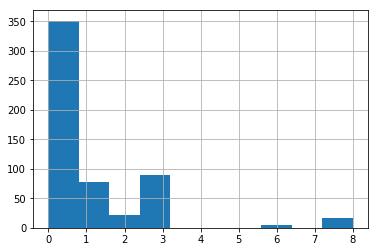

array([0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       8, 0, 8, 0, 0, 0, 3, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 3, 0, 0, 3,
       0, 3, 0, 1, 0, 0, 1, 3, 0, 2, 3, 0, 2, 0, 0, 3, 0, 3, 0, 8, 0, 0, 0,
       8, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 0, 6, 3, 3,
       3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 8, 0, 0, 3,
       0, 0, 0, 2, 3, 0, 3, 0, 3, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 3, 0, 3, 2, 0, 0, 0, 8, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 3, 3, 1, 3, 0, 0, 1, 2, 8, 0, 0, 3, 1, 3, 3,
       0, 0, 1, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 1, 3, 1, 3, 0,
       0, 1, 3, 8, 3, 1, 2, 3, 0, 0, 0, 0, 0, 1, 6, 3, 0, 8, 3, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       1, 0, 3, 0, 8, 1, 0, 8, 1, 3, 3, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 3, 3, 0, 0, 0, 1, 0, 1, 0,
       3, 0,

In [83]:
from sklearn.cluster import KMeans 

# train seperately
input_x = np.array(df[['max_area','average_area','num_cnt','average','wid','len']])
  
fkmeans = KMeans(n_clusters = 3).fit(input_x) 

df['flabel'] = fkmeans.labels_

input_c = np.array(df[['r','g','b']])
  
ckmeans = KMeans(n_clusters = 3).fit(input_c) 

df['clabel'] = ckmeans.labels_

# and then make an combination
df['cflabel'] = 3 *df['flabel']

df['cflabel'] = df['cflabel'] + df['clabel']

df['cflabel'].hist()
plt.show()
df['cflabel'].values

# Segmentation: Separating Individual Objects

* The function separate_obj separates the objects in an image after a thresholding method has been applied
* The function convert2runlength finds the objects in an image (1 corresponds to object, 0 to background) and finds runs of continuous object pixels
* The function rle generates a dataframe of images in run-length format. This is the output format required by the Kaggle competition

In [7]:
## STEP 3: Separate individual objects and encode in run-length format

# separate objects in image into individual masks
def separate_obj(img_masked):
    labels, nlabels = ndimage.label(img_masked)

    label_arrays = []
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        label_arrays.append(label_mask)
    return labels, nlabels, label_mask

# convert path to run-length encoding (RLE) output format
def convert2runlength(x):
    obj = np.where(x.T.flatten()==1)[0] #1 corresponds to object, 0 to background
    run_lengths = []
    prev = -2
    for b in obj: # find continuous set of object pixels
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return " ".join([str(i) for i in run_lengths])

def rle(img_masked, im_id):
    (labels, nlabels, label_mask) = separate_obj(img_masked)
    im_df = pd.DataFrame()
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        if label_mask.flatten().sum() > 10:
            rle = convert2runlength(label_mask)
            s = pd.Series({'ImageId': im_id, 'EncodedPixels': rle})
            im_df = im_df.append(s, ignore_index=True)
    return im_df

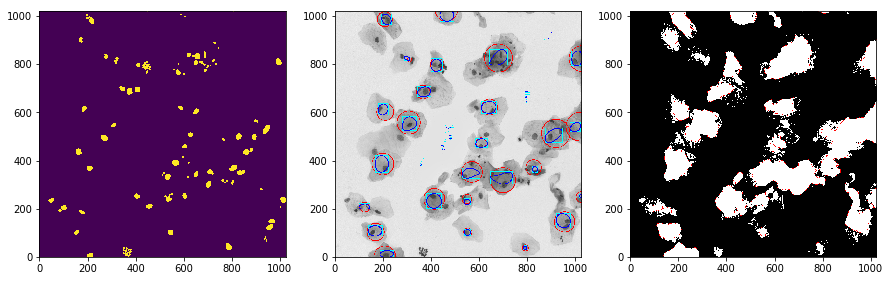

In [8]:
# Function to contour segment images
def contouring(img_float32, borderSize, gap, draw='off'):  
    img = float2int8(img_float32[:, :, :3])

    # perform a BGR->HSV conversion and use the V channel for processing
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # threshold, apply morphological closing, then take the distance transform (dist)
    th, bw = cv2.threshold(float2int8( hsv[:, :, 2] ), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    morph = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
    dist = cv2.distanceTransform(morph, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
    distborder = cv2.copyMakeBorder(dist, borderSize, borderSize, borderSize, borderSize, cv2.BORDER_CONSTANT | cv2.BORDER_ISOLATED, 0)

    # create a template, take its distance transform and use it as the template (temp)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*(borderSize-gap)+1, 2*(borderSize-gap)+1))
    kernel2 = cv2.copyMakeBorder(kernel2, gap, gap, gap, gap, cv2.BORDER_CONSTANT | cv2.BORDER_ISOLATED, 0)
    distTempl = cv2.distanceTransform(kernel2, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)

    # template matching (dist*temp)
    nxcor = cv2.matchTemplate(distborder, distTempl, cv2.TM_CCOEFF_NORMED)

    # find local maxima of the resulting image, positions correspond to circle centers and values correspond to radii
    mn, mx, _, _ = cv2.minMaxLoc(nxcor)

    # thresholdig template matched image
    th, peaks = cv2.threshold(nxcor, mx*0.5, 255, cv2.THRESH_BINARY)
    peaks8u = cv2.convertScaleAbs(peaks)
    _, contours, _ = cv2.findContours(peaks8u, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    # peaks8u = cv2.convertScaleAbs(peaks)    # to use as mask

    # detecting circles as local maxima
#     if draw == 'on':
    for i in range(len(contours)):
        x, y, w, h = cv2.boundingRect(contours[i])
        _, mx, _, mxloc = cv2.minMaxLoc(dist[y:y+h, x:x+w], peaks8u[y:y+h, x:x+w])
        cv2.circle(img, (int(mxloc[0]+x), int(mxloc[1]+y)), int(mx), (255, 0, 0), 2)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 255), 2)
        cv2.drawContours(img, contours, i, (0, 0, 255), 2)
            
    img_contoured = img

    return img_contoured

#### TESTING
(img, mask) = load_zipped_img(path+'/stage1_train.zip', 177)
#177
img_guess, markers, sure_bg, sure_fg, uncertain = watershed(img)

# one way of determining borderSize and gap
num_markers = np.max(markers)
obj_size = []
for i in range(1, num_markers):
    obj_size.append(len(markers[markers==i]))

min_size = min(a for a in obj_size)
max_size = max(a for a in obj_size)
avg_size = np.sum(obj_size)/num_markers

borderSize = int(np.sqrt(5000))
gap = int(borderSize/10)

img_contoured = contouring(img, borderSize, gap, draw='off')

fig, ax = plt.subplots(1,3, figsize = (15,15))

ax[0].imshow(sum(mask), origin='lower')
ax[1].imshow(img_contoured, origin='lower')
ax[2].imshow(img_guess, origin='lower')
plt.show()

# Active Contour Modeling

* This method applies level set methods for nucleus segmentation

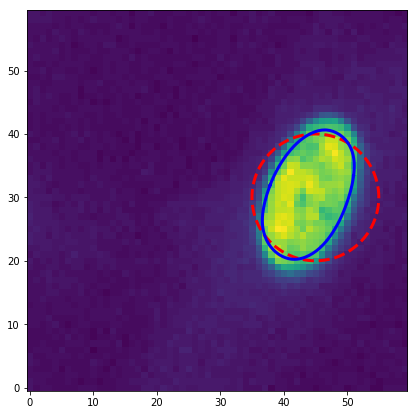

In [24]:
from skimage.segmentation import active_contour
from skimage.filters import gaussian

(img, mask) = load_zipped_img(path+'/stage1_train.zip', 1)
img = grayscale(img)[100:160,100:160]

s = np.linspace(0, 2*np.pi, 400)
x = 45 + 10*np.cos(s)
y = 30 + 10*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(img, 3), init, alpha=0.015, beta=10, gamma=0.001)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, origin = 'lower')
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
#ax.set_xticks([]), ax.set_yticks([])
#ax.axis([0, img.shape[1], img.shape[0], 0])
plt.show()

# Data Shape Manipulation

* The function one_index takes an image (2d array) and converts it to a 1d array. They are indexed from top to bottom then left to right
* The function pad_normalize helps account for variation in image sizes. It determines the maximum length in a set of one-indexed images and "pads" all other one-indexed images with zeros so that all images have the same length.

In [9]:
# one-indexes a 2d array into 1d, top down then left right, output is np 1d array
def one_index(arr2d):
    h, w = arr2d.shape[0:2]
    
    arr1d = []
    for col in range(0, w):
        for row in range(0, h):
            arr1d.append(arr2d[row][col])
    return np.array(arr1d)
    
# pads all vectors in array to have max_len, returns np array
def pad_normalize(array, max_len):
    for i in range(0, len(array)):
        vec = array[i]
        if len(vec) < max_len:
            array[i] = np.concatenate(( np.array(vec).reshape(1,-1), np.zeros((1, (max_len-len(vec)))) ), axis=1)
        else:
            array[i] = np.array(vec).reshape(1,-1)
    return np.array(array)



In [10]:
#Separate the cells 

# Training a Model

* X = a vector of the one-indexed images in the training set
* Y = a vector containing the sum of the one-indexed masks for each image (The correct nuclei)
* Currently fits a Random Forest Classifier with a maximum depth of 4. The feature vector contains the following information:
    1. The grayscale pixel intensity (continuous)
    2. The watershed prediction for a pixel (discrete)
    3. The magnitude of the gradient of pixel intensity (calculated using the Sobel operator)
    4-6. The intensity for the rgb color channels respectively (continuous)

# Model Validation

* Tests the performance of the model
* Uses cross-validation for tuning of hyperparameters?
* Uses confusion matrix to quantify types of errors (fp, fn, tp, tn)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Not rigorous but I picked a few images to train on - it went pretty well

n_samples = [0, 19, 50, 100, 149, 150, 175, 177, 200, 250, 300, 350, 400, 510, 560, 650]
#n_samples = range(0,560)
x_train = np.zeros(7).reshape(1,7) # predicted segmentation using Otsu's thresholding

y_train = np.zeros(1) # "correct" segmentation from sum of masks

max_len = 0
conm = []
acc = []
for i in n_samples:
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) # loads image and associated masks
    
    print(i)
    (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)

    intensity=grayscale(img)
    #img_guess = otsu(intensity)
    img_guess=grayscale(img_guess)
    #img_guess = np.dot(0,intensity)
    laplac = laplace(grayscale(img))[uncertain==255].reshape(-1,1)
    fil = sobel(grayscale(img))[uncertain==255].reshape(-1,1)
    #fil = sobel(grayscale(img)).reshape(-1,1)
    intensity_raw = intensity[uncertain==255].reshape(-1,1)
    #intensity_raw = intensity.reshape(-1,1)
    watershed_raw = img_guess[uncertain==255].reshape(-1,1)
    #watershed_raw = img_guess.reshape(-1,1)
    
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ch1,ch2,ch3 = cv2.split(img3)
    #ch1 = ch1.reshape(-1,1)
    #ch2 = ch2.reshape(-1,1)
    #ch3 = ch3.reshape(-1,1)
    
    ch1 = ch1[uncertain==255].reshape(-1,1)
    ch2 = ch2[uncertain==255].reshape(-1,1)
    ch3 = ch3[uncertain==255].reshape(-1,1)
    
    feature = np.concatenate((intensity_raw,watershed_raw, fil, laplac, ch1, ch2, ch3), axis = 1) # Features include grayscale intensity, watershed, sobel, rgb channels
    
    
    y_raw = sum(masks)
    y_raw = y_raw[uncertain==255].reshape(-1,1)
    

    x_train = np.append(x_train,feature).reshape(-1,7)
    y_train = np.append(y_train,y_raw).reshape(-1,1)
    
    
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train)
# Kept a split training set around but not needed

#clf = svm.SVC(C = 1.0)
clf = RandomForestClassifier(max_depth=5, random_state=0)
%time clf.fit(Xtrain, ytrain[:,0]) #599 ms for a training set of this size!
    

    #y_pred = clf.predict(Xtest)
    #cm = confusion_matrix(ytest, y_pred)
    #print(cm)
    #conm.append(cm)
    #accuracy = sklearn.metrics.accuracy_score(ytest, y_pred)
    #print(accuracy)
    #acc.append(accuracy)
    
    #(img_guess, markers, sure_bg, sure_fg, unknown, reduced_area) = watershed(img)

    #fig, ax = plt.subplots(1,4, figsize = (10,10))

    #ax[0].imshow(sum(masks), origin='lower')
    #ax[1].imshow(grayscale(img), origin='lower')
    #ax[2].imshow(output, origin='lower')
    #ax[3].imshow(img_guess, origin='lower')
    #plt.show()

#A = np.array(acc)
#Avg_acc = np.mean(A)
#print(Avg_acc)

0
19
50
100
149
150
175
177
200
250
300
350
400
510
560
650
Wall time: 4.87 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Here is the sad sad SVM Model

In [12]:
# Random Forest Except using HSV instead of RGB
def standardize(vec):
    m = np.mean(vec)
    s = np.std(vec)
    standardized = np.array([(v - m)/s for v in vec])
    return standardized.reshape(-1,1)
# Not rigorous but I picked a few images to train on - it went pretty well
from sklearn.ensemble import RandomForestClassifier
#n_samples = [0, 19, 50, 100, 149, 150, 175, 177, 200, 250, 300, 350, 400, 510, 560]
#n_samples = range(0,2)
n_samples = [0, 19, 100, 149, 175]
x_train = np.zeros(6).reshape(1,6)

y_train = np.zeros(1) # "correct" segmentation from sum of masks

max_len = 0
conm = []
acc = []
for i in n_samples:
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) # loads image and associated masks
    
    print(i)
    (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)

    intensity=grayscale(img)
    #img_guess = otsu(intensity)
    img_guess=grayscale(img_guess)
    #img_guess = np.dot(0,intensity)
    fil = sobel(grayscale(img))[uncertain==255].reshape(-1,1)
    #fil = sobel(grayscale(img)).reshape(-1,1)
    intensity_raw = intensity[uncertain==255].reshape(-1,1)
    #intensity_raw = intensity.reshape(-1,1)
    watershed_raw = img_guess[uncertain==255].reshape(-1,1)
    #watershed_raw = img_guess.reshape(-1,1)
    
    watershed_raw = standardize(watershed_raw)
    
    
    
    #img_cv = float2int8(img[:, :, :3])

    # perform a BGR->HSV conversion and use the V channel for processing
    #hsv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
    
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ch1,ch2,ch3 = cv2.split(img3)
    #ch1 = ch1.reshape(-1,1)
    #ch2 = ch2.reshape(-1,1)
    #ch3 = ch3.reshape(-1,1)
    
    print(ch1.shape)
    
    ch1 = ch1[uncertain==255].reshape(-1,1)/255
    ch2 = ch2[uncertain==255].reshape(-1,1)/255
    ch3 = ch3[uncertain==255].reshape(-1,1)/255
    
    feature = np.concatenate((intensity_raw,watershed_raw, fil, ch1, ch2, ch3), axis = 1) # Features include grayscale intensity, watershed, sobel, rgb channels
    
    
    y_raw = sum(masks)
    y_raw = y_raw[uncertain==255].reshape(-1,1)
    

    x_train = np.append(x_train,feature).reshape(-1,6)
    y_train = np.append(y_train,y_raw).reshape(-1,1)
    
    
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train)
print(Xtrain.shape)
# Kept a split training set around but not needed
print('training')
s_v = svm.SVC(C = 0.01)
#clf = RandomForestClassifier(max_depth=5, random_state=0)
%time s_v.fit(Xtrain, ytrain[:,0]) #599 ms for a training set of this size!
    

%time y_pred = s_v.predict(Xtest)
    #cm = confusion_matrix(ytest, y_pred)
    #print(cm)
    #conm.append(cm)
accuracy = sklearn.metrics.accuracy_score(ytest, y_pred)
precision = sklearn.metrics.precision_score(ytest, y_pred)
print(accuracy, precision)
    #acc.append(accuracy)
    
    #(img_guess, markers, sure_bg, sure_fg, unknown, reduced_area) = watershed(img)

    #fig, ax = plt.subplots(1,4, figsize = (10,10))

    #ax[0].imshow(sum(masks), origin='lower')
    #ax[1].imshow(grayscale(img), origin='lower')
    #ax[2].imshow(output, origin='lower')
    #ax[3].imshow(img_guess, origin='lower')
    #plt.show()

#A = np.array(acc)
#Avg_acc = np.mean(A)
#print(Avg_acc)

#Training time

#2 images (C = 0.01)
    #Wall time: 5.41 s
    #accuracy, precision = 0.834308592547 0.933757961783 (cross-validation)
    
#5 images (C = 0.01)
    #Wall time: 13min 14s
    #accuracy, precision = 0.926969259481 0.85477582846 (cross-validation)


0
(256, 256)
19
(256, 256)
100
(256, 256)
149
(1024, 1024)
175
(256, 320)
(170393, 6)
training
Wall time: 13min 14s
0.926969259481 0.85477582846


In [ ]:
def evaluate_model(img, predicted_masks, true_masks, separated_masks = True):
    
    
    
    if separated_masks = False:
        
        
    
    
    return df_model

In [14]:
# Testing the classifier on the remaining images
acc = []
for i in range(0,5):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i)

    (img_guess, markers, sure_bg, sure_fg, unknown) = watershed(img)
    intensity = grayscale(img)
    shap = intensity.shape
    intensity_raw = intensity.reshape(-1,1)
    #watershed_raw = img_guess[unknown==255].reshape(-1,1)
    watershed_raw = grayscale(img_guess).reshape(-1,1)
    fil = sobel(grayscale(img)).reshape(-1,1)
    laplac = laplace(grayscale(img)).reshape(-1,1)
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    #img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #ch1,ch2,ch3 = cv2.split(hsv)    
    
    
    ch1,ch2,ch3 = cv2.split(img3)
    ch1 = ch1.reshape(-1,1)
    ch2 = ch2.reshape(-1,1)
    ch3 = ch3.reshape(-1,1)
    #print(ch1.shape)
    #print(intensity_raw.shape)
    feature = np.concatenate((intensity_raw,watershed_raw, fil, ch1, ch2, ch3), axis = 1)

    %time yp = s_v.predict(feature)
    y_real = sum(masks).reshape(-1,1)
    accuracy = sklearn.metrics.accuracy_score(y_real, yp)
    precision = sklearn.metrics.precision_score(y_real, yp)
    f1 = sklearn.metrics.f1_score(y_real, yp)
    print(i, accuracy, precision, f1)
    acc.append([accuracy, precision, f1])

    #output = yp.reshape(shap[0],shap[1])
    
precision = np.mean(np.array(acc)[:,1])
accuracy = np.mean(np.array(acc)[:,0])
f1 = np.mean(np.array(acc)[:,2])
print('The average precision of the model is {}%'.format(precision*100))
print('The average accuracy of the model is {}%'.format(accuracy*100))
print('The average f1-score of the model is {}%'.format(f1*100))


Wall time: 52.4 s
0 0.932052612305 0.909390444811 0.331481759496
Wall time: 54.4 s
1 0.934524536133 0.871121718377 0.145389364668
Wall time: 1min 8s
2 0.646862792969 0.0 0.0


C:\Users\John\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Wall time: 1min 8s
3 0.823498535156 0.0 0.0


C:\Users\John\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\John\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Wall time: 1min 8s
4 0.933142089844 0.883720930233 0.0270030200746
The average precision of the model is 53.2846618684038%
The average accuracy of the model is 85.401611328125%
The average f1-score of the model is 10.077482884771552%


# Working Example of the Code

* Demonstrates the methods involved using a smaller set of 30 training images
* Evaluates performance based on a confusion matrix and accuracy (compared to the true masks)

In [53]:
precision = np.mean(np.array(acc)[:,1])
accuracy = np.mean(np.array(acc)[:,0])
f1 = np.mean(np.array(acc)[:,2])
print('The average precision of the model is {}%'.format(precision*100))
print('The average accuracy of the model is {}%'.format(accuracy*100))
print('The average f1-score of the model is {}%'.format(f1*100))

The average precision of the model is 81.38706474131074%
The average accuracy of the model is 94.68844817046038%
The average f1-score of the model is 74.83144803204694%


(256, 256) 11 (256, 256)
11


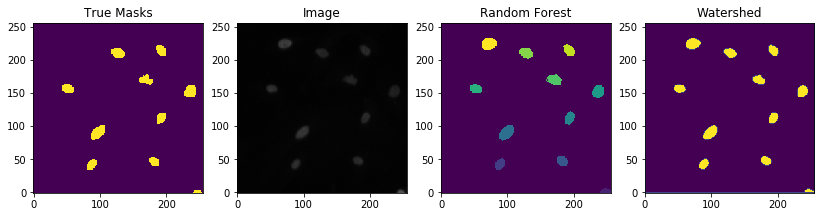

In [119]:
for i in range(173,174):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i)

    (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)

    intensity = grayscale(img)
    shap = intensity.shape
    intensity_raw = intensity.reshape(-1,1)
    #watershed_raw = img_guess[unknown==255].reshape(-1,1)
    watershed_raw = grayscale(img_guess).reshape(-1,1)
    fil = sobel(grayscale(img)).reshape(-1,1)
    img_type = df['cflabel'][i]*np.ones(len(watershed_raw)).reshape(-1,1)
    laplac = laplace(grayscale(img)).reshape(-1,1)
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ch1,ch2,ch3 = cv2.split(img3)
    ch1 = ch1.reshape(-1,1)
    ch2 = ch2.reshape(-1,1)
    ch3 = ch3.reshape(-1,1)
    feature = np.concatenate((intensity_raw,watershed_raw, fil, laplac, ch1, ch2, ch3, img_type), axis = 1)

    yp = clf.predict(feature)
    y_real = sum(masks).reshape(-1,1)
    
    labels, nlabels, label_mask = separate_obj(grayscale(yp.reshape(shap[0], shap[1])))
    
    print(labels.shape, nlabels, label_mask.shape)
    print(len(masks))
    
fig, ax = plt.subplots(1,4, figsize = (14,14))

ax[0].imshow(sum(masks), origin='lower')
ax[0].set_title('True Masks')
ax[1].imshow(img, origin='lower')
ax[1].set_title('Image')
#ax[2].imshow(grayscale(yp.reshape(shap[0], shap[1])), origin='lower')
ax[2].imshow(labels, origin = 'lower')
ax[2].set_title('Random Forest')
ax[3].imshow(grayscale(img_guess), origin='lower')
ax[3].set_title('Watershed')
plt.show()

In [159]:
# Compare mask by mask

def predicted_mask_list(total_mask): #Separates a sum of masks into individual masks
    obj_detected = np.max(total_mask) + 1
    mask_list_pred = []
    for i in range(1, obj_detected):
        mask_p = total_mask == i*np.ones(total_mask.shape)
        mask_list_pred.append(mask_p)
        
    return mask_list_pred


def iou(img, predicted_masks, real_masks): # Determines Intersection over Union metric
    mask_iou = []
    mask_num = len(masks)
    
    pred_mask_num = len(predicted_masks)
    
    for i in range(0, mask_num):
        individual_mask = masks[i]
        best_match = 0
        nearest_mask = 0
        for j in range(0, pred_mask_num):
            match = np.sum(predicted_masks[j] == real_masks[i])
            
            if match > best_match:
                nearest_mask = j
                
                best_match = match
                
        #print(nearest_mask)

        m = real_masks[i]
        #guess = predicted_masks[nearest]
            
        mask_i = np.sum(m[predicted_masks[nearest_mask] == 1])
                
        mask_u = np.sum(predicted_masks[nearest_mask] == 1) + np.sum(m == 1) - mask_i
        
             
        mask_iou.append(mask_i/mask_u)
            
        
    return mask_iou

mask_list_p = predicted_mask_list(labels)

print(iou(grayscale(yp.reshape(shap[0], shap[1])), mask_list_p , masks))

[0.90268456375838924, 0.89573459715639814, 0.88059701492537312, 0.60649819494584833, 0.60869565217391308, 0.81171548117154813, 0.84514435695538059, 0.84037558685446012, 0.87394957983193278, 0.0, 0.74311926605504586]


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Not rigorous but I picked a few images to train on - it went pretty well

n_samples = [0, 19, 50, 100, 149, 150, 175, 177, 200, 250, 300, 350, 400, 510, 559]
#n_samples = range(0,560)
x_train = np.zeros(8).reshape(1,8) # predicted segmentation using Otsu's thresholding

y_train = np.zeros(1) # "correct" segmentation from sum of masks

max_len = 0
conm = []
acc = []
for i in n_samples:
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) # loads image and associated masks
    
    print(i)
    (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)

    intensity=grayscale(img)
    #img_guess = otsu(intensity)
    img_guess=grayscale(img_guess)
    #img_guess = np.dot(0,intensity)
    laplac = laplace(grayscale(img))[uncertain==255].reshape(-1,1)
    fil = sobel(grayscale(img))[uncertain==255].reshape(-1,1)
    #fil = sobel(grayscale(img)).reshape(-1,1)
    intensity_raw = intensity[uncertain==255].reshape(-1,1)
    #intensity_raw = intensity.reshape(-1,1)
    watershed_raw = img_guess[uncertain==255].reshape(-1,1)
    #watershed_raw = img_guess.reshape(-1,1)
    #print(np.ones(len(watershed_raw)).shape)
    img_type = df['cflabel'][i]*np.ones(len(watershed_raw)).reshape(-1,1)
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ch1,ch2,ch3 = cv2.split(img3)
    #ch1 = ch1.reshape(-1,1)
    #ch2 = ch2.reshape(-1,1)
    #ch3 = ch3.reshape(-1,1)
    
    ch1 = ch1[uncertain==255].reshape(-1,1)
    ch2 = ch2[uncertain==255].reshape(-1,1)
    ch3 = ch3[uncertain==255].reshape(-1,1)
    
    feature = np.concatenate((intensity_raw,watershed_raw, fil, laplac, ch1, ch2, ch3, img_type), axis = 1) # Features include grayscale intensity, watershed, sobel, rgb channels
    
    
    y_raw = sum(masks)
    y_raw = y_raw[uncertain==255].reshape(-1,1)
    

    x_train = np.append(x_train,feature).reshape(-1,8)
    y_train = np.append(y_train,y_raw).reshape(-1,1)
    
    
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train)
# Kept a split training set around but not needed

#clf = svm.SVC(C = 1.0)
clf = RandomForestClassifier(max_depth=6, random_state=0)
%time clf.fit(Xtrain, ytrain[:,0]) #599 ms for a training set of this size!
    

    #y_pred = clf.predict(Xtest)
    #cm = confusion_matrix(ytest, y_pred)
    #print(cm)
    #conm.append(cm)
    #accuracy = sklearn.metrics.accuracy_score(ytest, y_pred)
    #print(accuracy)
    #acc.append(accuracy)
    
    #(img_guess, markers, sure_bg, sure_fg, unknown, reduced_area) = watershed(img)

    #fig, ax = plt.subplots(1,4, figsize = (10,10))

    #ax[0].imshow(sum(masks), origin='lower')
    #ax[1].imshow(grayscale(img), origin='lower')
    #ax[2].imshow(output, origin='lower')
    #ax[3].imshow(img_guess, origin='lower')
    #plt.show()

#A = np.array(acc)
#Avg_acc = np.mean(A)
#print(Avg_acc)

0
19
50
100
149
150
175
177
200
250
300
350
400
510
559
Wall time: 12.7 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [95]:
# Testing the classifier on the remaining images
acc = []
for i in range(0,560):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i)

    (img_guess, markers, sure_bg, sure_fg, unknown) = watershed(img)
    intensity = grayscale(img)
    shap = intensity.shape
    intensity_raw = intensity.reshape(-1,1)
    #watershed_raw = img_guess[unknown==255].reshape(-1,1)
    watershed_raw = grayscale(img_guess).reshape(-1,1)
    fil = sobel(grayscale(img)).reshape(-1,1)
    laplac = laplace(grayscale(img)).reshape(-1,1)
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_type = df['cflabel'][i]*np.ones(len(watershed_raw)).reshape(-1,1)
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #ch1,ch2,ch3 = cv2.split(hsv)    
    
    
    ch1,ch2,ch3 = cv2.split(img3)
    ch1 = ch1.reshape(-1,1)
    ch2 = ch2.reshape(-1,1)
    ch3 = ch3.reshape(-1,1)
    #print(ch1.shape)
    #print(intensity_raw.shape)
    feature = np.concatenate((intensity_raw,watershed_raw, fil, laplac, ch1, ch2, ch3, img_type), axis = 1)

    yp = clf.predict(feature)
    y_real = sum(masks).reshape(-1,1)
    accuracy = sklearn.metrics.accuracy_score(y_real, yp)
    precision = sklearn.metrics.precision_score(y_real, yp)
    f1 = sklearn.metrics.f1_score(y_real, yp)
    print(i, accuracy, precision, f1)
    acc.append([accuracy, precision, f1])

    #output = yp.reshape(shap[0],shap[1])
    
precision = np.mean(np.array(acc)[:,1])
accuracy = np.mean(np.array(acc)[:,0])
f1 = np.mean(np.array(acc)[:,2])
print('The average precision of the model is {}%'.format(precision*100))
print('The average accuracy of the model is {}%'.format(accuracy*100))
print('The average f1-score of the model is {}%'.format(f1*100))


0 0.969528198242 0.768273716952 0.83185989728
1 0.974746704102 0.740964840556 0.845572454978
2 0.892297363281 0.947755211117 0.828282828283
3 0.949694824219 0.824115876599 0.86447199658
4 0.980419921875 0.872095220102 0.851974898487
5 0.459716796875 0.0773522433976 0.143534420202
6 0.871292114258 0.689623740315 0.763533402484
7 0.976666666667 0.942311809868 0.953216374269
8 0.440200805664 0.0274388619532 0.053165406354
9 0.969714506173 0.913987645848 0.944333347516
10 0.953032407407 0.855305989583 0.911970150549
11 0.841542895145 0.546974185358 0.684526436579
12 0.894958496094 0.618857142857 0.758828475336
13 0.498123168945 0.131054131054 0.23034983035
14 0.966597222222 0.933867373366 0.934754103302
15 0.459533691406 0.0551354842182 0.103699579938
16 0.967849731445 0.683611924866 0.790160342595
17 0.970231481481 0.945651341485 0.950504195212
18 0.990325927734 0.608860759494 0.752150117279
19 0.431427001953 0.00837110103972 0.016574294009
20 0.992889404297 0.655325443787 0.791778373548


170 0.972477343059 0.93616502388 0.948712007703
171 0.970776367188 0.827715355805 0.888130841121
172 0.966192626953 0.84258301735 0.725859935659
173 0.988433837891 0.739941477688 0.842214820983
174 0.923248291016 0.549718400886 0.703034596765
175 0.893444824219 0.576818675353 0.593603054146
176 0.935290527344 0.868695195983 0.813888986413
177 0.985399246216 0.636751640439 0.741262759413
178 0.989364624023 0.721238938053 0.808041861746
179 0.983788580247 0.953960862576 0.970381335025
180 0.981393678161 0.880758739771 0.91268832819
181 0.937231445313 0.767732713954 0.769726824899
182 0.966622458002 0.939658290294 0.914919990985
183 0.96846540672 0.919547836663 0.900091915788
184 0.921981811523 0.705976967123 0.811042536679
185 0.916351318359 0.684225451967 0.778808908974
186 0.905151367188 0.951682229139 0.86861239812
187 0.969473916888 0.930336110313 0.933644051509
188 0.989099801061 0.696895624542 0.812597976343
189 0.960632716049 0.863501397299 0.92081082759
190 0.879418945312 0.76662

338 0.987717628479 0.610796645702 0.644098709481
339 0.452194213867 0.033599611378 0.0648589513167
340 0.932385253906 0.925947894329 0.879918485919
341 0.979956896552 0.867417982824 0.898249452954
342 0.927059936523 0.874327583009 0.612053433752
343 0.984756469727 0.649943417578 0.775253093363
344 0.968151855469 0.976569678407 0.830176397839
345 0.989456176758 0.701659937192 0.819062581828
346 0.990997314453 0.72607879925 0.839934888768
347 0.980910493827 0.935281302063 0.959347990404
348 0.455459594727 0.0869687876689 0.159692952507
349 0.905151367188 0.797276759406 0.868705643799
350 0.995161914235 0.514285714286 0.679245283019
351 0.968402777778 0.887077895476 0.936732329085
352 0.978111184792 0.928786994374 0.949699032332
353 0.850024414062 0.490469289934 0.588904503781
354 0.447616577148 0.0514790726948 0.0978393600319
355 0.494338989258 0.110913116259 0.198670051989
356 0.980038580247 0.924995780591 0.954924816615
357 0.495239257813 0.119690188406 0.212605922117
358 0.43499755859

506 0.924780273438 0.777644075809 0.854505100113
507 0.990600585938 0.755029056772 0.845768652979
508 0.540176391602 0.184344757231 0.307352839773
509 0.444061279297 0.0333796940195 0.0641150783457
510 0.948620605469 0.903549267808 0.896363233447
511 0.991843501326 0.638465447154 0.772992925254
512 0.979768518519 0.979295895018 0.96440691771
513 0.914538574219 0.819457723049 0.859578394207
514 0.522705078125 0.128094024356 0.224321777513
515 0.921902630416 0.881091562885 0.868819819276
516 0.990493774414 0.792060491493 0.843270440252
517 0.500030517578 0.153880150786 0.26540220608
518 0.957629203796 0.357216745771 0.513868677032
519 0.848068237305 0.763042111879 0.805652606718
520 0.968584217507 0.893999800658 0.926589274415
521 0.53092956543 0.175212129643 0.290652329418
522 0.976104736328 0.556895252449 0.485545335085
523 0.452285766602 0.0473208072373 0.089675635921
524 0.995040893555 0.718602455146 0.824038982133
525 0.518981933594 0.14261943708 0.242903117345
526 0.916000366211 0.

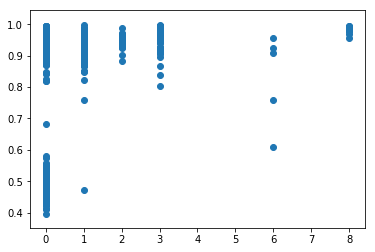

for type=>0


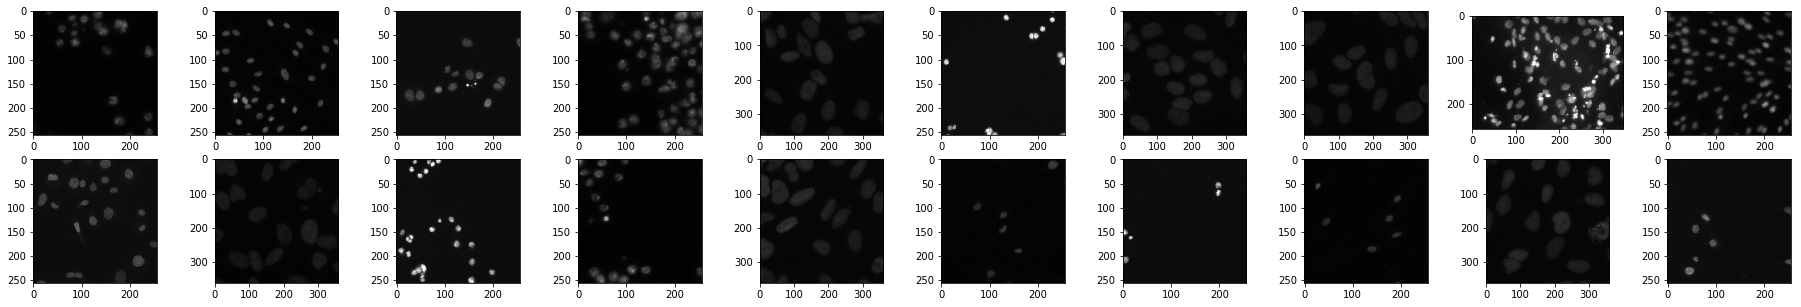

for type=>1


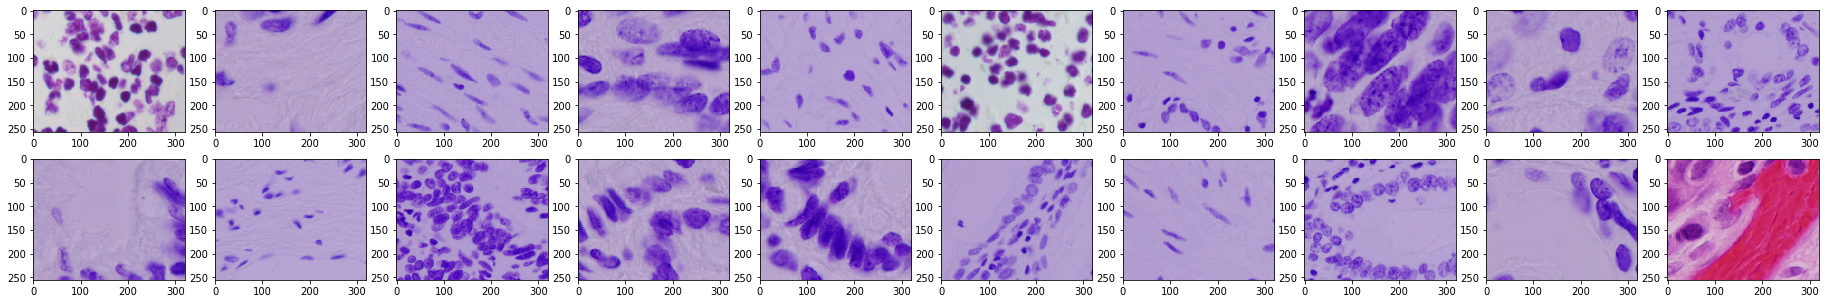

for type=>2


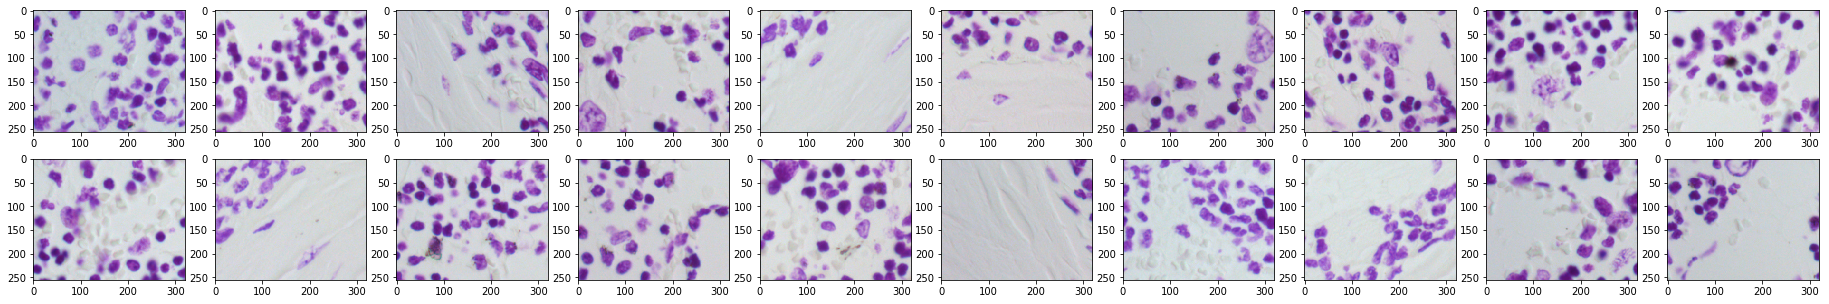

for type=>3


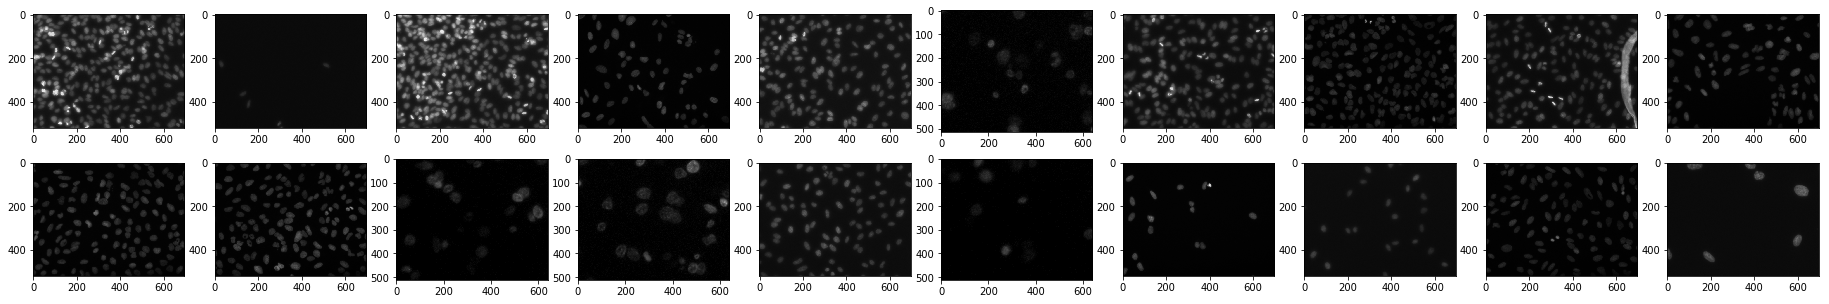

for type=>4


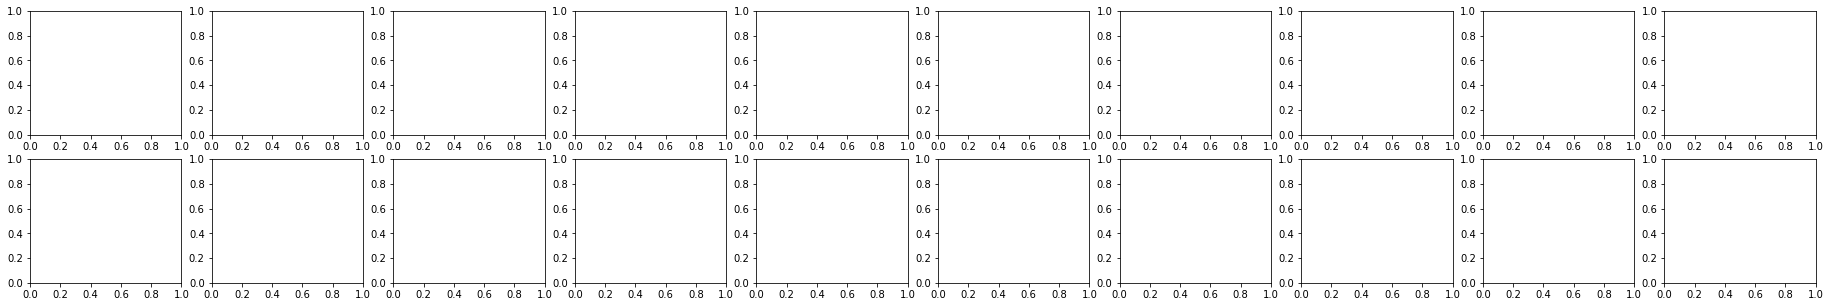

for type=>5


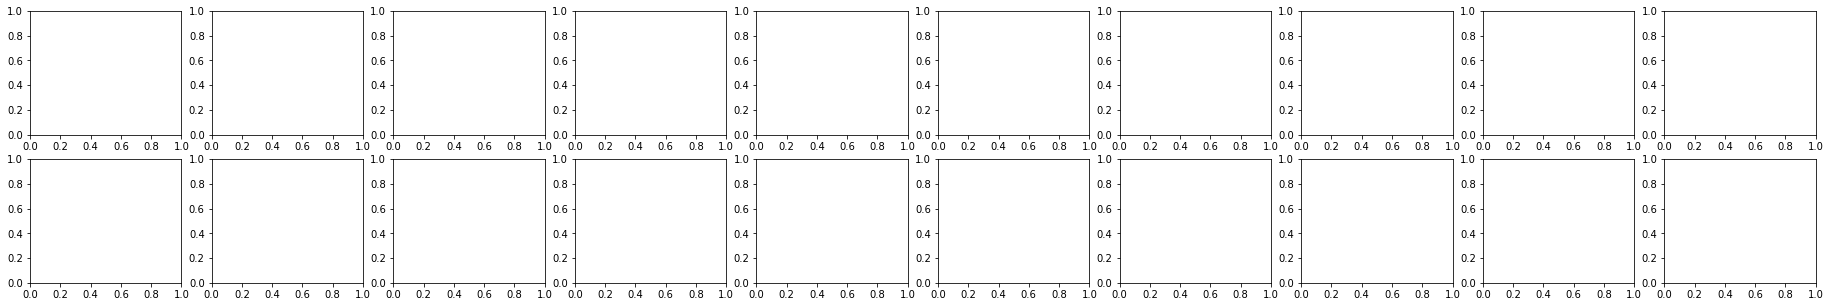

for type=>6


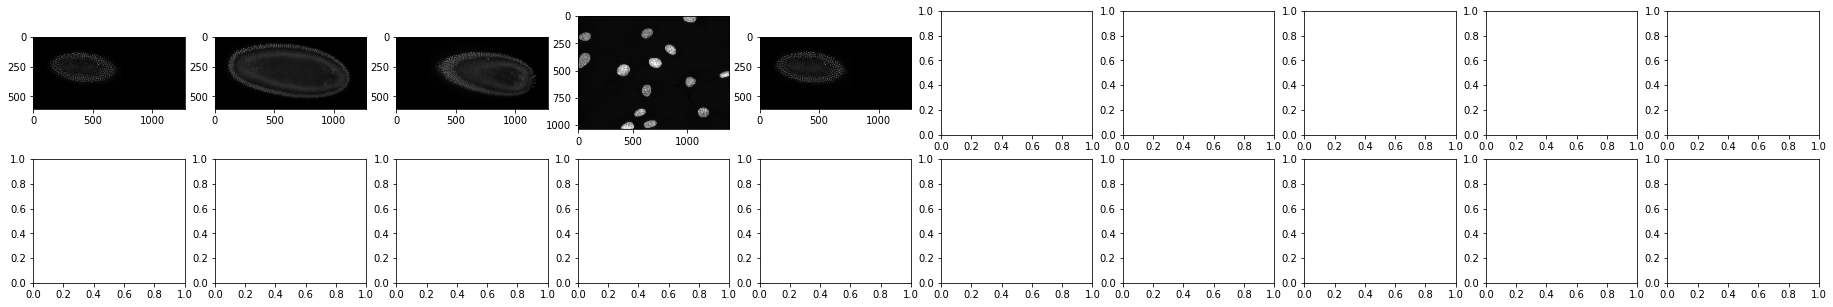

for type=>7


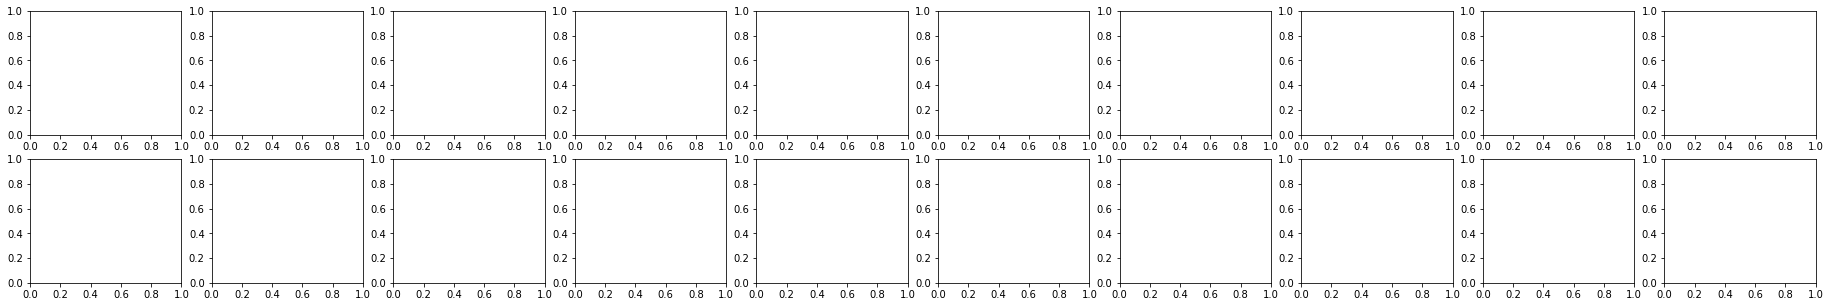

for type=>8


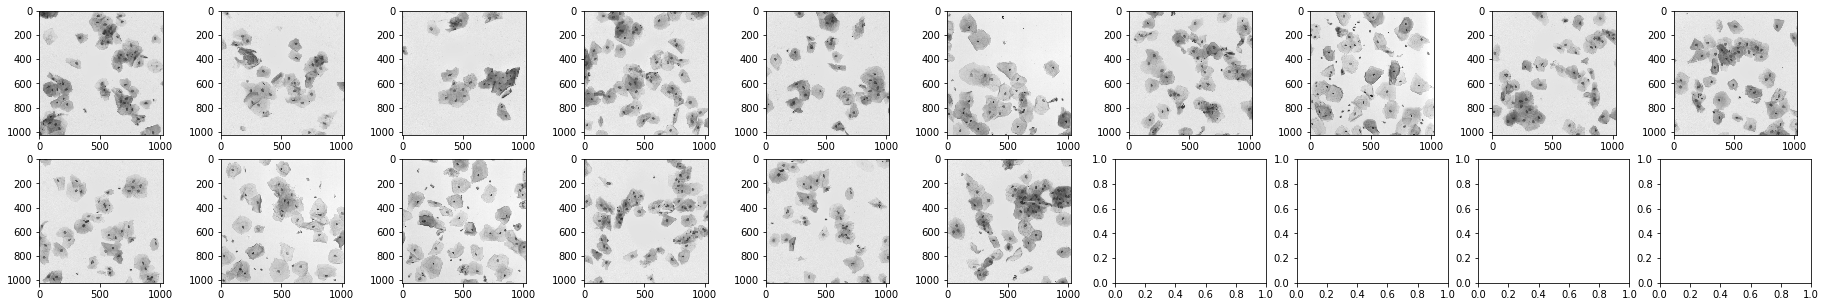

In [114]:
fig, ax = plt.subplots()
zz = df['cflabel'].values
acc_vec = np.array(acc)

ax.scatter(zz, acc_vec[:,0])
plt.show()

FDIV = 3
CDIV = 3
for t in range(FDIV*CDIV):
    print('for type=>'+str(t))
    fig,ax= plt.subplots(2,10,figsize=(32,5))
    
    n=0
    for i in range(2):
        for j in range(10):
            if n < len(df[df['cflabel']==t].index):
                sn = df[df['cflabel']==t].index[n]
                (img, masks) = load_zipped_img(path+'/stage1_train.zip', sn)
                ax[i,j].imshow(img)
                n = n+1
    plt.show()

In [ ]:
# Region Based Active Contour Segmentation
#
# seg = region_seg(I, init_mask, max_its, alpha, display)
#
# Inputs: I           2D image
#         init_mask   Initialization (1 = foreground, 0 = bg)
#         max_its     Number of iterations to run segmentation for
#         alpha       (optional) Weight of smoothing term
#                       higer = smoother.  default = 0.2
#         display     (optional) displays intermediate outputs
#                       default = true
#
# Outputs: seg        Final segmentation mask (1=fg, 0=bg)
#
# Description: This code implements the paper: "Active Contours Without
# Edges" By Chan Vese. This is a nice way to segment images whose
# foregrounds and backgrounds are statistically different and homogeneous.
#
# Example:
# img = imread('tire.tif');
# m = zeros(size(img));
# m(33:33+117, 44:44+128) = 1;
# seg = region_seg(img, m, 500);
#
# Coded by: Shawn Lankton (www.shawnlankton.com)
# ------------------------------------------------------------------------
# 
# Gif montage (save each step in a gif folder):
# convert -delay 50 gif/levelset*.png levelset.gif

import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt


eps = np.finfo(float).eps


def chanvese(I, init_mask, max_its=200, alpha=0.2,
             thresh=0, color='r', display=False):
    I = I.astype(np.float)

    # Create a signed distance map (SDF) from mask
    phi = mask2phi(init_mask)

    if display:
        plt.ion()
        fig, axes = plt.subplots(ncols=2)
        show_curve_and_phi(fig, I, phi, color)
        plt.savefig('levelset_start.png', bbox_inches='tight')

    # Main loop
    its = 0
    stop = False
    prev_mask = init_mask
    c = 0

    while (its < max_its and not stop):
        # Get the curve's narrow band
        idx = np.flatnonzero(np.logical_and(phi <= 1.2, phi >= -1.2))

        if len(idx) > 0:
            # Intermediate output
            if display:
                if np.mod(its, 50) == 0:
                    print('iteration: {0}'.format(its))
                    show_curve_and_phi(fig, I, phi, color)
            else:
                if np.mod(its, 10) == 0:
                    print('iteration: {0}'.format(its))

            # Find interior and exterior mean
            upts = np.flatnonzero(phi <= 0)  # interior points
            vpts = np.flatnonzero(phi > 0)  # exterior points
            u = np.sum(I.flat[upts]) / (len(upts) + eps)  # interior mean
            v = np.sum(I.flat[vpts]) / (len(vpts) + eps)  # exterior mean

            # Force from image information
            F = (I.flat[idx] - u)**2 - (I.flat[idx] - v)**2
            # Force from curvature penalty
            curvature = get_curvature(phi, idx)

            # Gradient descent to minimize energy
            dphidt = F / np.max(np.abs(F)) + alpha * curvature

            # Maintain the CFL condition
            dt = 0.45 / (np.max(np.abs(dphidt)) + eps)

            # Evolve the curve
            phi.flat[idx] += dt * dphidt

            # Keep SDF smooth
            phi = sussman(phi, 0.5)

            new_mask = phi <= 0
            c = convergence(prev_mask, new_mask, thresh, c)

            if c <= 5:
                its = its + 1
                prev_mask = new_mask
            else:
                stop = True

        else:
            break

    # Final output
    if display:
        show_curve_and_phi(fig, I, phi, color)
        plt.savefig('levelset_end.png', bbox_inches='tight')

    # Make mask from SDF
    seg = phi <= 0  # Get mask from levelset

    return seg, phi, its


# ---------------------------------------------------------------------
# ---------------------- AUXILIARY FUNCTIONS --------------------------
# ---------------------------------------------------------------------

def bwdist(a):
    """
    Intermediary function. 'a' has only True/False vals,
    so we convert them into 0/1 values - in reverse.
    True is 0, False is 1, distance_transform_edt wants it that way.
    """
    return nd.distance_transform_edt(a == 0)


# Displays the image with curve superimposed
def show_curve_and_phi(fig, I, phi, color):
    fig.axes[0].cla()
    fig.axes[0].imshow(I, cmap='gray')
    fig.axes[0].contour(phi, 0, colors=color)
    fig.axes[0].set_axis_off()
    plt.draw()

    fig.axes[1].cla()
    fig.axes[1].imshow(phi)
    fig.axes[1].set_axis_off()
    plt.draw()
    
    plt.pause(0.001)


def im2double(a):
    a = a.astype(np.float)
    a /= np.abs(a).max()
    return a


# Converts a mask to a SDF
def mask2phi(init_a):
    phi = bwdist(init_a) - bwdist(1 - init_a) + im2double(init_a) - 0.5
    return phi


# Compute curvature along SDF
def get_curvature(phi, idx):
    dimy, dimx = phi.shape
    yx = np.array([np.unravel_index(i, phi.shape) for i in idx])  # subscripts
    y = yx[:, 0]
    x = yx[:, 1]

    # Get subscripts of neighbors
    ym1 = y - 1
    xm1 = x - 1
    yp1 = y + 1
    xp1 = x + 1

    # Bounds checking
    ym1[ym1 < 0] = 0
    xm1[xm1 < 0] = 0
    yp1[yp1 >= dimy] = dimy - 1
    xp1[xp1 >= dimx] = dimx - 1

    # Get indexes for 8 neighbors
    idup = np.ravel_multi_index((yp1, x), phi.shape)
    iddn = np.ravel_multi_index((ym1, x), phi.shape)
    idlt = np.ravel_multi_index((y, xm1), phi.shape)
    idrt = np.ravel_multi_index((y, xp1), phi.shape)
    idul = np.ravel_multi_index((yp1, xm1), phi.shape)
    idur = np.ravel_multi_index((yp1, xp1), phi.shape)
    iddl = np.ravel_multi_index((ym1, xm1), phi.shape)
    iddr = np.ravel_multi_index((ym1, xp1), phi.shape)

    # Get central derivatives of SDF at x,y
    phi_x = -phi.flat[idlt] + phi.flat[idrt]
    phi_y = -phi.flat[iddn] + phi.flat[idup]
    phi_xx = phi.flat[idlt] - 2 * phi.flat[idx] + phi.flat[idrt]
    phi_yy = phi.flat[iddn] - 2 * phi.flat[idx] + phi.flat[idup]
    phi_xy = 0.25 * (- phi.flat[iddl] - phi.flat[idur] +
                     phi.flat[iddr] + phi.flat[idul])
    phi_x2 = phi_x**2
    phi_y2 = phi_y**2

    # Compute curvature (Kappa)
    curvature = ((phi_x2 * phi_yy + phi_y2 * phi_xx - 2 * phi_x * phi_y * phi_xy) /
                 (phi_x2 + phi_y2 + eps) ** 1.5) * (phi_x2 + phi_y2) ** 0.5

    return curvature


# Level set re-initialization by the sussman method
def sussman(D, dt):
    # forward/backward differences
    a = D - np.roll(D, 1, axis=1)
    b = np.roll(D, -1, axis=1) - D
    c = D - np.roll(D, -1, axis=0)
    d = np.roll(D, 1, axis=0) - D

    a_p = np.clip(a, 0, np.inf)
    a_n = np.clip(a, -np.inf, 0)
    b_p = np.clip(b, 0, np.inf)
    b_n = np.clip(b, -np.inf, 0)
    c_p = np.clip(c, 0, np.inf)
    c_n = np.clip(c, -np.inf, 0)
    d_p = np.clip(d, 0, np.inf)
    d_n = np.clip(d, -np.inf, 0)

    a_p[a < 0] = 0
    a_n[a > 0] = 0
    b_p[b < 0] = 0
    b_n[b > 0] = 0
    c_p[c < 0] = 0
    c_n[c > 0] = 0
    d_p[d < 0] = 0
    d_n[d > 0] = 0

    dD = np.zeros_like(D)
    D_neg_ind = np.flatnonzero(D < 0)
    D_pos_ind = np.flatnonzero(D > 0)

    dD.flat[D_pos_ind] = np.sqrt(
        np.max(np.concatenate(
            ([a_p.flat[D_pos_ind]**2], [b_n.flat[D_pos_ind]**2])), axis=0) +
        np.max(np.concatenate(
            ([c_p.flat[D_pos_ind]**2], [d_n.flat[D_pos_ind]**2])), axis=0)) - 1
    dD.flat[D_neg_ind] = np.sqrt(
        np.max(np.concatenate(
            ([a_n.flat[D_neg_ind]**2], [b_p.flat[D_neg_ind]**2])), axis=0) +
        np.max(np.concatenate(
            ([c_n.flat[D_neg_ind]**2], [d_p.flat[D_neg_ind]**2])), axis=0)) - 1

    D = D - dt * sussman_sign(D) * dD
    return D


def sussman_sign(D):
    return D / np.sqrt(D**2 + 1)


# Convergence Test
def convergence(p_mask, n_mask, thresh, c):
    diff = p_mask - n_mask
    n_diff = np.sum(np.abs(diff))
    if n_diff < thresh:
        c = c + 1
    else:
        c = 0
    return c


if __name__ == "__main__":
    img = nd.imread('brain.png', flatten=True)
    mask = np.zeros(img.shape)
    mask[20:100, 20:100] = 1

    chanvese(img, mask, max_its=1000, display=True, alpha=1.0)